# Comparing 2016 SAT data with 2017

Getting a sense of what the new SAT data look like. Nothing really surprising here.

If you're not a programmer, just read the sections with bold headings, and looking at the charts and tables they reference. You can ignore all the gray code boxes.

# Part 1: Just importing and recombining the data

Nothing to see here, unless you're into this kind of thing.

In [1]:
import pandas as pd

In [2]:
def get_data(year="2015-16"):
    
    ret = pd.read_csv("data/CTSchoolDaySAT" + year + ".csv",skiprows=3,header=[0,1])
    
    ret.columns = ['District',
                   'District Code',
                   'Subject',
                   'Total Number of Students',
                   'Total Number Tested',
                   'Connecticut School Day SAT Participation Rate',
                   'Total Numberwith Scored Tests',
                   'Level 1 Not Met Count',
                   'Level 1 Not Met Count %',
                   'Level 2 Approaching Count',
                   'Level 2 Approaching %',
                   'Level 3 Met Count',
                   'Level 3 Met Count %',
                   'Level 4 Exceeded Count',
                   'Level 4 Exceeded Count %',
                   'Level 3&4 Met or Exceeded Count',
                   'Level 3&4 Met or Exceeded %',
                   'Average Score']
    
    ret["year"] = year
    
    
    ret = ret.set_index(["District","year","Subject"])
#     ret = ret.set_index(["District Code","year","Subject"])
    
    return ret


In [3]:
scores_17 = get_data(year="2016-17")
scores_16 = get_data(year="2015-16")
scores_17.head(10)

District Code  \
District                                         year    Subject                 
Achievement First Hartford Academy Inc. District 2016-17 ELA        ="2880013"   
                                                         Math       ="2880013"   
Amistad Academy District                         2016-17 ELA        ="2790013"   
                                                         Math       ="2790013"   
Ansonia School District                          2016-17 ELA        ="0020011"   
                                                         Math       ="0020011"   
Area Cooperative Educational Services            2016-17 ELA        ="2440014"   
                                                         Math       ="2440014"   
Avon School District                             2016-17 ELA        ="0040011"   
                                                         Math       ="0040011"   

                                                                 Total Number of Students  \
District                                         year    Subject                            
Achievement First Hartford Academy Inc. District 2016-17 ELA                           39   
                                                         Math                          39   
Amistad Academy District                         2016-17 ELA                           50   
                                                         Math                          50   
Ansonia School District                          2016-17 ELA                          134   
                                                         Math                         134   
Area Cooperative Educational Services            2016-17 ELA                           18   
                                                         Math                          18   
Avon School District                             2016-17 ELA                          285   
                                                         Math                         285   

                                                                 Total Number Tested  \
District                                         year    Subject                       
Achievement First Hartford Academy Inc. District 2016-17 ELA                      39   
                                                         Math                     39   
Amistad Academy District                         2016-17 ELA                      48   
                                                         Math                     48   
Ansonia School District                          2016-17 ELA                     127   
                                                         Math                    127   
Area Cooperative Educational Services            2016-17 ELA                      15   
                                                         Math                     15   
Avon School District                             2016-17 ELA                     282   
                                                         Math                    282   

                                                                 Connecticut School Day SAT Participation Rate  \
District                                         year    Subject                                                 
Achievement First Hartford Academy Inc. District 2016-17 ELA                                             100.0   
                                                         Math                                            100.0   
Amistad Academy District                         2016-17 ELA                                              96.0   
                                                         Math                                             96.0   
Ansonia School District                          2016-17 ELA                                              94.8   
                                                         Math                                             94

In [4]:
scores_both = pd.concat([scores_16,scores_17])

In [5]:
districts = []
for index, row in scores_both.iterrows():
    if index[0] not in districts:
        districts.append(index[0])
def make_delta_df():
    ret = []
    for dist in districts:
        
        row ={}
        row["district"] = dist
        
        def add_col(new_c, old_c):
            
            def add_col_y(year,cat):
#                 row[new_c + " " + cat.lower() + " " + year] = scores_both.loc[dist, year, cat][old_c]

                try:
                    row[new_c + " " + cat.lower() + " " + year] = scores_both.loc[dist, year, cat][old_c]
                    #row[new_c + " " + cat.lower() + " " + year] = scores_both.loc[dist, y, cat][old_c]
                except:
                    row[new_c + " " + cat.lower() + " " + year] = None
            
            add_col_y("2015-16","Math")
            add_col_y("2015-16","ELA")
            add_col_y("2016-17","Math")
            add_col_y("2016-17","ELA")
 
        add_col("num tested","Total Number Tested")
        add_col("avg score","Average Score")
        add_col("% goal","Level 3&4 Met or Exceeded %")
        add_col("% behind","Level 1 Not Met Count %")

        ret.append( row )
        
    ret = pd.DataFrame(ret).set_index("district")
    
    
    def num_col(c):
        ret[c] = pd.to_numeric(ret[c],errors="coerce")
        
    num_col("avg score math 2015-16")
    num_col("avg score math 2016-17")
    num_col("avg score ela 2015-16")
    num_col("avg score ela 2016-17")
    
    num_col("% goal math 2015-16")
    num_col("% goal math 2016-17")
    num_col("% goal ela 2015-16")
    num_col("% goal ela 2016-17")
    
    num_col("% behind math 2015-16")
    num_col("% behind math 2016-17")
    num_col("% behind ela 2015-16")
    num_col("% behind ela 2016-17")


    
    ret["math score diff"] = pd.to_numeric(ret["avg score math 2016-17"],errors="coerce")\
    - pd.to_numeric(ret["avg score math 2015-16"], errors="coerce")
        
    ret["ela score diff"] = pd.to_numeric(ret["avg score ela 2016-17"],errors="coerce")\
    - pd.to_numeric(ret["avg score ela 2015-16"], errors="coerce")
        
    ret["math % goal diff"] = pd.to_numeric(ret["% goal math 2016-17"],errors="coerce")\
    - pd.to_numeric(ret["% goal math 2015-16"], errors="coerce")
    
    ret["ela % goal diff"] = pd.to_numeric(ret["% goal ela 2016-17"],errors="coerce")\
    - pd.to_numeric(ret["% goal ela 2015-16"], errors="coerce")


    return ret
        
delta_df = make_delta_df()
delta_df.head()

,% behind ela 2015-16,% behind ela 2016-17,% behind math 2015-16,% behind math 2016-17,% goal ela 2015-16,% goal ela 2016-17,% goal math 2015-16,% goal math 2016-17,avg score ela 2015-16,avg score ela 2016-17,avg score math 2015-16,avg score math 2016-17,num tested ela 2015-16,num tested ela 2016-17,num tested math 2015-16,num tested math 2016-17,math score diff,ela score diff,math % goal diff,ela % goal diff
district,,,,,,,,,,,,,,,,,,,,
Achievement First Hartford Academy Inc. District,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.0,488.0,537.0,494.0,30,39,30,39,-43.0,-41.0,NaN,NaN
Amistad Academy District,13.6,NaN,25.0,21.3,NaN,NaN,22.7,19.1,515.0,511.0,470.0,467.0,44,48,44,48,-3.0,-4.0,-3.6,NaN
Ansonia School District,26.8,29.9,42.0,45.2,NaN,49.6,21.7,16.7,476.0,478.0,448.0,444.0,138,127,138,127,-4.0,2.0,-5.0,NaN
Area Cooperative Educational Services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,15,19,15,NaN,NaN,NaN,NaN
Avon School District,3.3,5.0,5.3,4.6,90.1,88.3,76.6,79.1,607.0,603.0,603.0,611.0,245,282,245,282,8.0,-4.0,2.5,-1.8


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

# Part 2: Exploratory analysis

# Distribution of change in scores 

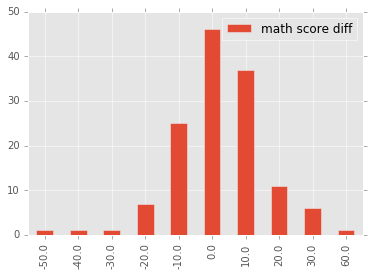

In [7]:
delta_df["math score diff"].apply(lambda x: x - x % 10).value_counts().sort_index().to_frame().plot.bar()

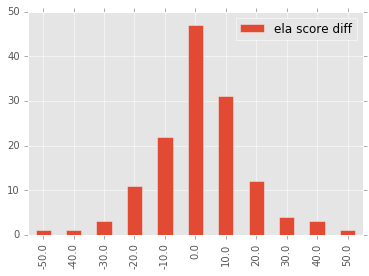

In [8]:
delta_df["ela score diff"].apply(lambda x: x - x % 10).value_counts().sort_index().to_frame().plot.bar()

# Frequency of 'significant' gains, increases

Above, it looks like maybe more schools made gains in math scores than in ELA. Let's see if that's true.


In [9]:
# Number of schools with ELA score increases greater than/equal to 10 and 20 points
print len(delta_df[delta_df["ela score diff"] >= 10])
print len(delta_df[delta_df["ela score diff"] >= 20])

51
20


In [10]:
# Number of schools with 10+ point decrecases in ELA
print len(delta_df[delta_df["ela score diff"] <= -10])
print len(delta_df[delta_df["ela score diff"] <= -20])

17
7


In [11]:
# Number of schools with 10+ point increases in Math
print len(delta_df[delta_df["math score diff"] >= 10])
print len(delta_df[delta_df["math score diff"] >= 20])

55
18


In [12]:
# Number of schools with 10+ point decrecases in Math
print len(delta_df[delta_df["math score diff"] <= -10])
print len(delta_df[delta_df["math score diff"] <= -20])

12
3


# Correlation between score changes

Firs the plot, then the correlation numbers

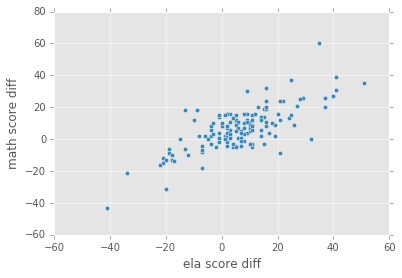

In [13]:
delta_df.plot.scatter(x="ela score diff",
                      y="math score diff")

In [14]:
delta_df[["ela score diff","math score diff"]].corr()

,ela score diff,math score diff
ela score diff,1.00000,0.75008
math score diff,0.75008,1.00000


In [15]:

# What's the correlation between ELA score change and ELA score in 2016?
# Not a lot.
delta_df[["ela score diff","avg score ela 2015-16"]].corr()

,ela score diff,avg score ela 2015-16
ela score diff,1.000000,0.024102
avg score ela 2015-16,0.024102,1.000000


# Outliers?

Which schools had the biggest difference in math change versus ELA change? Are any schools getting better in one area and worse in another, or else just making very asymmetric improvements?

In [16]:
outlier_df = delta_df[["ela score diff","math score diff"]]
outlier_df["diff diff"] = outlier_df["math score diff"] - outlier_df["ela score diff"]
outlier_df.sort_values(by="diff diff",ascending=False).head(10)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,ela score diff,math score diff,diff diff
district,,,
Explorations District,-13.0,18.0,31.0
Colchester School District,-9.0,18.0,27.0
Thomaston School District,35.0,60.0,25.0
The Gilbert School District,-10.0,12.0,22.0
Clinton School District,9.0,30.0,21.0
East Granby School District,16.0,32.0,16.0
North Haven School District,-1.0,15.0,16.0
Meriden School District,-1.0,14.0,15.0
Eastern Connecticut Regional Educational Service Center (EASTCONN),-15.0,0.0,15.0


In [17]:
outlier_df.sort_values(by="diff diff",ascending=True).head(10)

,ela score diff,math score diff,diff diff
district,,,
Capital Preparatory Harbor School Inc. District,32.0,0.0,-32.0
Regional School District 12,21.0,-9.0,-30.0
Woodstock Academy District,15.0,-3.0,-18.0
Wethersfield School District,19.0,2.0,-17.0
Elm City College Preparatory School District,37.0,20.0,-17.0
Simsbury School District,26.0,9.0,-17.0
Greenwich School District,11.0,-5.0,-16.0
Common Ground High School District,51.0,35.0,-16.0
Ledyard School District,11.0,-3.0,-14.0


# Strong relationship between math and ELA scores

Schools that do well on one test do well on the other. Not unexpected.

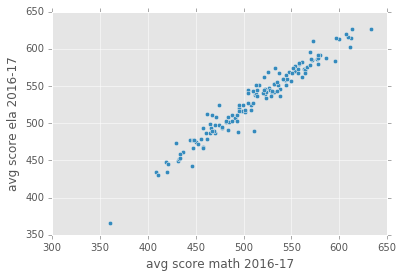

In [18]:
delta_df.plot.scatter(x="avg score math 2016-17",y="avg score ela 2016-17")

In [19]:
delta_df[["avg score math 2016-17","avg score ela 2016-17"]].corr()

,avg score math 2016-17,avg score ela 2016-17
avg score math 2016-17,1.000000,0.974084
avg score ela 2016-17,0.974084,1.000000


# Relationship between average score and number of students meeting goal

In schools with high average scores, a large percentage of students are meeting goal. Also not super surprising.

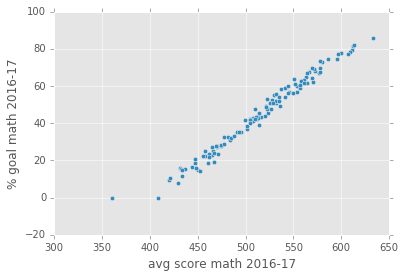

In [20]:
delta_df.plot.scatter(x="avg score math 2016-17",y="% goal math 2016-17")

In [21]:
delta_df[["avg score math 2016-17","% goal math 2016-17"]].corr()

,avg score math 2016-17,% goal math 2016-17
avg score math 2016-17,1.000000,0.990137
% goal math 2016-17,0.990137,1.000000


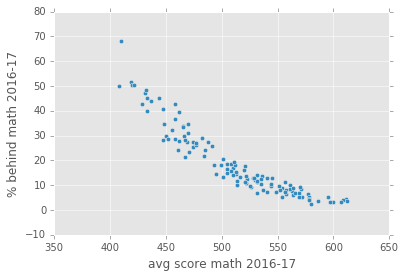

In [22]:
# Looking at how avg score tracks % of students behind, we see a negative correlation

delta_df.plot.scatter(x="avg score math 2016-17",y='% behind math 2016-17')

In [23]:
delta_df[["avg score math 2016-17","% behind math 2016-17"]].corr()


,avg score math 2016-17,% behind math 2016-17
avg score math 2016-17,1.000000,-0.927094
% behind math 2016-17,-0.927094,1.000000


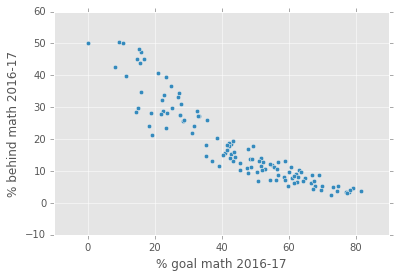

In [24]:
delta_df.plot.scatter(x="% goal math 2016-17",y='% behind math 2016-17')

In [25]:
delta_df[["% behind math 2016-17","% goal math 2016-17"]].corr()

,% behind math 2016-17,% goal math 2016-17
% behind math 2016-17,1.000000,-0.919781
% goal math 2016-17,-0.919781,1.000000
